In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
startup = pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
pd.unique(startup['State'])

array(['New York', 'California', 'Florida'], dtype=object)

In [12]:
startup.nunique(axis=0)

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [13]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


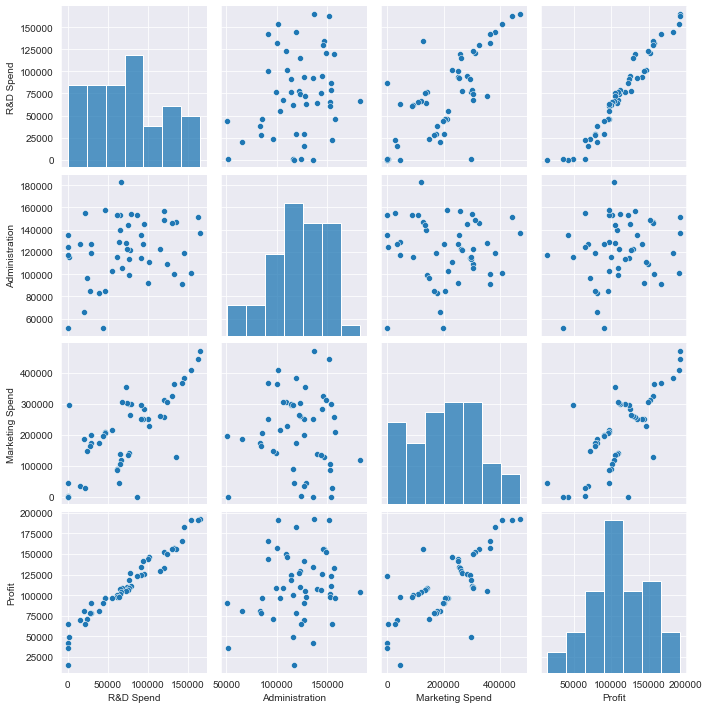

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [18]:
df=startup.drop(['State'],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
df=df.rename(columns={'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'})
df.head()

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [23]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+AD+MS',data=df).fit()

In [24]:
#Coefficients
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [25]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

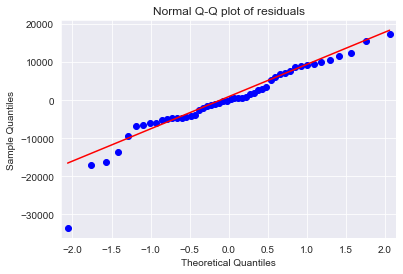

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x19c78dbde50>,
 'caps': [<matplotlib.lines.Line2D at 0x19c78c99220>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c78b75d90>],
 'medians': [<matplotlib.lines.Line2D at 0x19c7915ee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c7915e280>],
 'means': []}

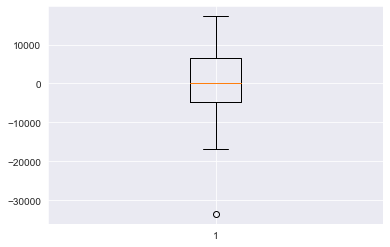

In [31]:
plt.boxplot(model.resid)

In [29]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

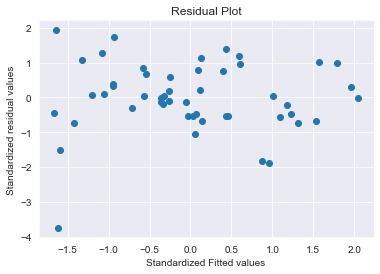

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

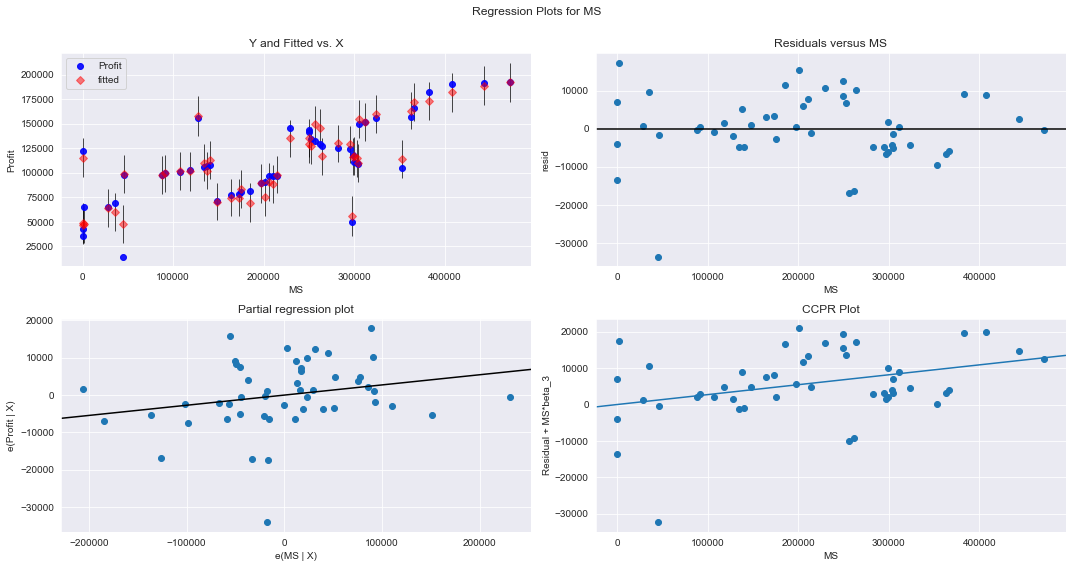

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

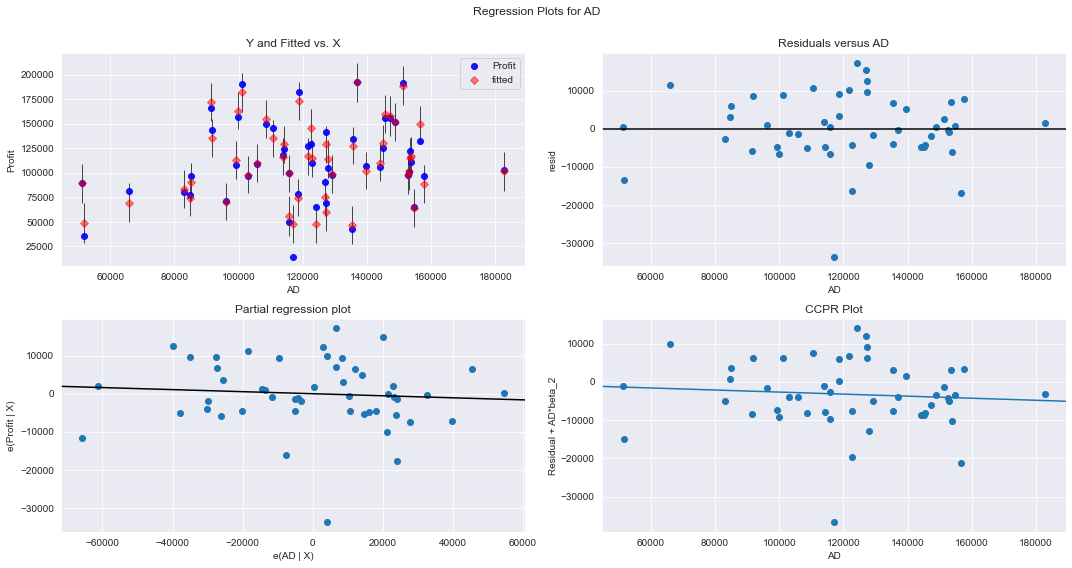

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "AD", fig=fig)
plt.show()

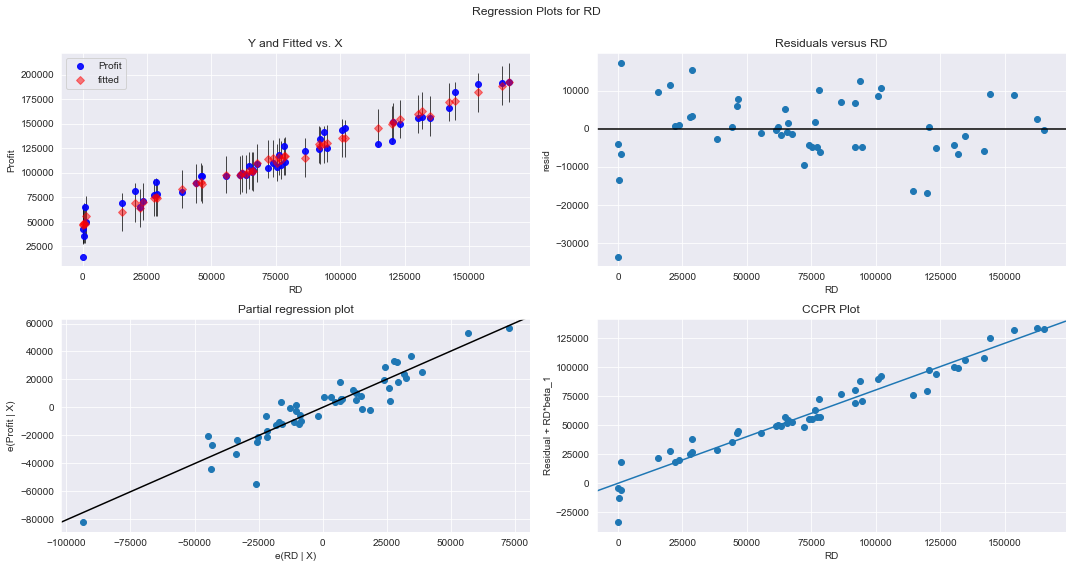

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

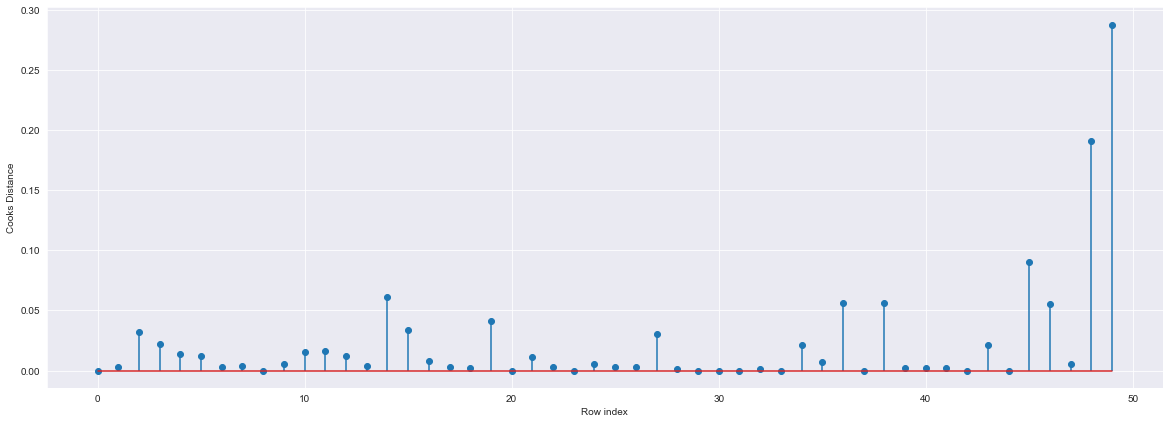

In [40]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

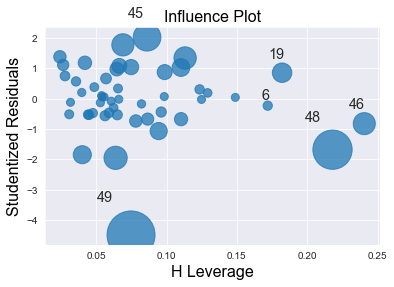

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [43]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [47]:
df[df.index.isin([49,48,46])]

,RD,AD,MS,Profit
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [48]:
df.head()

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [49]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df.drop(df.index[[46,48,49]],axis=0).reset_index()

In [50]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [51]:
df1

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [54]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Profit~RD+AD+MS',data=df1).fit()

In [55]:
#Coefficients
model1.params

Intercept    58228.661466
RD               0.764210
AD              -0.053193
MS               0.025087
dtype: float64

In [56]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     9.860294
RD           18.703677
AD           -1.202351
MS            1.695609
dtype: float64 
 Intercept    1.320777e-12
RD           2.824273e-22
AD           2.358069e-01
MS           9.719027e-02
dtype: float64


In [57]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9614129113440602, 0.9587207888796923)